# Playground

In [2]:
import numpy as np
import networkx as nx
import csv
import matplotlib.pyplot as plt
import os

# File Generation

In [3]:
# Function for generating a CSV file containing an Erdos-Renyi network
def erdos_reyni_csv_generator(num_nodes, probability, ERY_filename):
    """
    Generates erdos-reyni network
    Skips generation if file already exists.
    Does not generate multiple copies of the file with the same name.

    Args:
    num_nodes: number of nodes
    p: edge probability.
    filename: csv file to specify with number of nodes generated.

    Returns:
    Generates CSV with specified number of nodes and probability.
    """
    if os.path.exists(ERY_filename):
        print(f"The file {ERY_filename} already exists. Skipping CSV Generation.")
        return
    else:
        print(f"Erdos-Renyi graph generated with {num_nodes} nodes and edge probability {probability}, saved to {ERY_filename}!")
    
    G = nx.erdos_renyi_graph(num_nodes, probability)
    with open(ERY_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Change the number of nodes as required
num_nodes = 1000
probability = 0.3

ERY_filename = f'erdos_reyni_network_{num_nodes}.csv'
erdos_reyni_csv_generator(num_nodes, probability, ERY_filename)

The file erdos_reyni_network_1000.csv already exists. Skipping CSV Generation.


In [4]:
# Function for generating a Barabasi-Albert network in CSV format
def barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, BA_filename):
    """
    Generates barabasi-albert network
    Skips generation if file already exists.
    Does not generate multiple copies of the file with the same name.

    Args:
    num_nodes: number of nodes
    num_edges_to_attach: number of edges to attach to from a new node to existing node.
    filename: csv file to specify with number of nodes generated.

    Returns:
    Generates CSV with specified number of nodes and attached edges.
    """
    if os.path.exists(BA_filename):
        print(f"The file {BA_filename} already exists. Skipping CSV Generation.")
        return
    else:
        print(f"Barabási-Albert network with {num_nodes} nodes and {num_edges_to_attach} edges to attach saved to {BA_filename}.")
        
    G = nx.barabasi_albert_graph(num_nodes, num_edges_to_attach)
    with open(BA_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Change the number of nodes as required
num_nodes = 1000  
num_edges_to_attach = 3  
BA_filename = f"barabasi_albert_network_{num_nodes}.csv" 

barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, BA_filename)

The file barabasi_albert_network_1000.csv already exists. Skipping CSV Generation.


In [5]:
# Generate a Watts-Strogatz network in CSV format
def watts_strogatz_csv_generator(num_nodes, k, p, WS_filename):
    """
    Generates watts-strogatz network.
    Skips generation if file already exists.
    Does not generate multiple copies of the file with the same name.

    Args:
    num_nodes: number of nodes.
    k: each node connected to k nearest neighbors in a ring topology.
    p: probability of rewiring each edge.
    filename: csv file to specify with number of nodes generated.

    Returns:
    Generates CSV with specified number of nodes and attached edges.
    """
    if os.path.exists(WS_filename):
        print(f"The file {WS_filename} already exists. Skipping CSV Generation.")
        return
    else:
        print(f"Watts-Strogatz network with {num_nodes} nodes, k={k}, and p={p} saved to {WS_filename}.")

    G = nx.watts_strogatz_graph(num_nodes, k, p)
    with open(WS_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

num_nodes = 5000  
k = 4  
p = 0.1  # Probability of rewiring each edge
WS_filename = f"watts_strogatz_network_{num_nodes}.csv"  

watts_strogatz_csv_generator(num_nodes, k, p, WS_filename)

The file watts_strogatz_network_5000.csv already exists. Skipping CSV Generation.


# Simulation 

In [6]:
import random
# Reading the above network generated file 
def load_graph_from_csv(filename):
    """
    Reads a Graph from above generated csv file
    """
    G = nx.Graph()
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            node1, node2 = row
            G.add_edge(node1, node2)
    return G

# A function to simulate the infection process
def simulate_infection(graph, p_infect, initial_infected):
    """
    Args:
    graph: The network graph.
    p_infect: The probability of infecting an unifected node.
    infected_nodes: List of initial infected nodes.

    Returns:
    rounds: time taken to infect nodes in each simulation.
    a list of infection nodes in each simulation per round (infection_history_1).
    """
    infected = set(initial_infected) # set to allow no duplicates
    infection_history = [list(infected)]
    rounds = 0
    while len(infected) < len(graph.nodes):
        new_infected = set()
        for node in list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor not in infected and random.random() < p_infect:
                    new_infected.add(neighbor)

        infected.update(new_infected)
        infection_history.append(list(new_infected))
        rounds += 1
    return rounds, infection_history

# Simultaneous cure and infection with defense
def simultaneous_infection_with_defense(graph, p_infect, p_defense, initial_infected, initial_cured):
    """
    Simulates worm propagation with defense on the graph for a certain number of rounds.

    Args:
    graph: The network graph.
    p_infection: The probability of infecting an uninfected node.
    p_defense: The probability of inoculating/curing a node.
    infected_nodes: List of initial infected nodes.
    initial_defense_node: The initial node from which defense starts.

    Returns:
    rounds: time taken to infect the nodes with defense.
    a list of infected nodes for each round at each simulation. (infection_history_2)
    a list of cured nodes for each round at each simulation. (cured_history_2)
    """
    infected = set(initial_infected)
    cured = set(initial_cured)
    infection_history = [list(infected)]
    cured_history = [list(cured)]
    rounds = 0
    while len(infected) < len(graph.nodes):
        newly_infected = set()
        newly_cured = set()
        
        for node in list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor not in infected and random.random() < p_infect:
                    newly_infected.add(neighbor)
        
        for node in list(cured) + list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor in infected and neighbor not in cured and random.random() < p_defense:
                    newly_cured.add(neighbor)
                    newly_infected.discard(neighbor)

        infected.update(newly_infected)
        cured.update(newly_cured)
        infected -= newly_cured

        infection_history.append(list(newly_infected))
        cured_history.append(list(newly_cured))

        rounds+=1
        
    return rounds, infection_history, cured_history

In [7]:
def plot_results_1(infection_history_1):
    """
    Deliverable (a)
    """
    # Prepare data for plotting
    cumulative_infections_1 = [len(infected_nodes) for infected_nodes in infection_history_1]
    new_infections_1 = [cumulative_infections_1[0]] + [cumulative_infections_1[i] - cumulative_infections_1[i-1] for i in range(1, len(cumulative_infections_1))]

    # Plotting
    plt.figure(figsize=(14, 6))

    # Cumulative infections plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(cumulative_infections_1)+1), cumulative_infections_1, marker='o')
    plt.title('Cumulative Number of Infections Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Cumulative Infections')
    plt.legend()

    # New infections per time step plot
    plt.subplot(1, 2, 2)
    plt.bar(range(1, len(new_infections_1)+1), new_infections_1)
    plt.title('New Infections Per Time Step')
    plt.xlabel('Time Step')
    plt.ylabel('Number of New Infections')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
def plot_results_2(infection_history_2, cured_history_2):
    """
    Deliverable (c), (d), and (e)
    """
    # Data preparation for plotting
    cumulative_infections_2 = [len(infected_nodes) for infected_nodes in infection_history_2]
    cumulative_cures = [len(cured) for cured in cured_history_2]
    
    # Calculate new infections and new cures per time step
    new_infections_2 = [cumulative_infections_2[0]] + [cumulative_infections_2[i] - cumulative_infections_2[i-1] for i in range(1, len(cumulative_infections_2))]
    new_cures = [len(cured_history_2[0])] + [len(cured_history_2[i]) - len(cured_history_2[i-1]) for i in range(1, len(cured_history_2))]

    # Plotting
    plt.figure(figsize=(14, 6))

    # Cumulative plot
    plt.subplot(1, 2, 1)
    plt.plot(cumulative_infections_2, label='Cumulative Infections', marker='o')
    plt.plot(cumulative_cures, label='Cumulative Cures', marker='x')
    plt.title('Cumulative Infections and Cures Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Count')
    plt.legend()

    # New infections and cures per time step plot
    plt.subplot(1, 2, 2)
    plt.bar(range(len(new_infections_2)), new_infections_2, label='New Infections')
    plt.bar(range(len(new_cures)), new_cures, label='New Cures', alpha=0.7)
    plt.title('New Infections and Cures Per Time Step')
    plt.xlabel('Time Step')
    plt.ylabel('Number')
    plt.legend()

    plt.tight_layout()
    plt.show()

Simulation 1:
 Round 1: ['900', '500']
 Round 2: ['181', '91', '256', '807', '451', '84', '324', '141', '279', '559', '113', '8', '603', '185', '630', '472', '673', '182', '579', '575', '548', '470', '334', '936', '721', '774', '674', '987', '471', '932', '392', '462', '949', '894', '952', '423', '523', '245', '653', '865', '984', '33', '284', '156', '556', '361', '670', '298', '729', '567', '746', '359', '142', '918', '223', '600', '272', '941', '800', '519', '1', '665', '889', '468', '639', '873', '238', '211', '841', '717', '401', '18', '893', '9', '816', '502', '861', '3', '707', '208', '907', '372', '7', '347', '715', '812', '863', '488', '954', '839', '376', '513', '605', '325', '904', '809', '140', '801', '573', '960', '733', '457', '814', '155', '834', '424', '609', '617', '23', '492', '829', '434', '998', '408', '823', '65', '532', '507', '375', '228', '494', '40', '677', '465', '137', '568', '939', '350', '247', '851', '300', '410', '988', '525', '322', '195', '67', '417', '2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Simulation 9:
 Round 1: ['900', '500']
 Round 2: ['629', '820', '256', '451', '84', '8', '279', '559', '967', '603', '11', '185', '651', '630', '193', '579', '575', '470', '248', '177', '936', '176', '757', '721', '781', '774', '106', '987', '72', '471', '932', '902', '462', '659', '305', '392', '245', '653', '737', '219', '94', '173', '724', '938', '284', '984', '670', '361', '298', '729', '862', '746', '567', '735', '122', '918', '272', '519', '1', '889', '873', '511', '238', '841', '981', '18', '835', '893', '9', '401', '907', '3', '707', '347', '715', '812', '863', '125', '488', '487', '954', '220', '134', '28', '809', '801', '573', '960', '658', '424', '844', '814', '609', '355', '434', '188', '492', '327', '804', '803', '989', '821', '921', '310', '242', '494', '40', '843', '465', '137', '20', '346', '939', '838', '350', '972', '851', '410', '322', '131', '948', '495', '241', '827', '417', '732', '867', '613', '628', '664', '710', '750', '477', '52', '460', '943', '158', '540', '

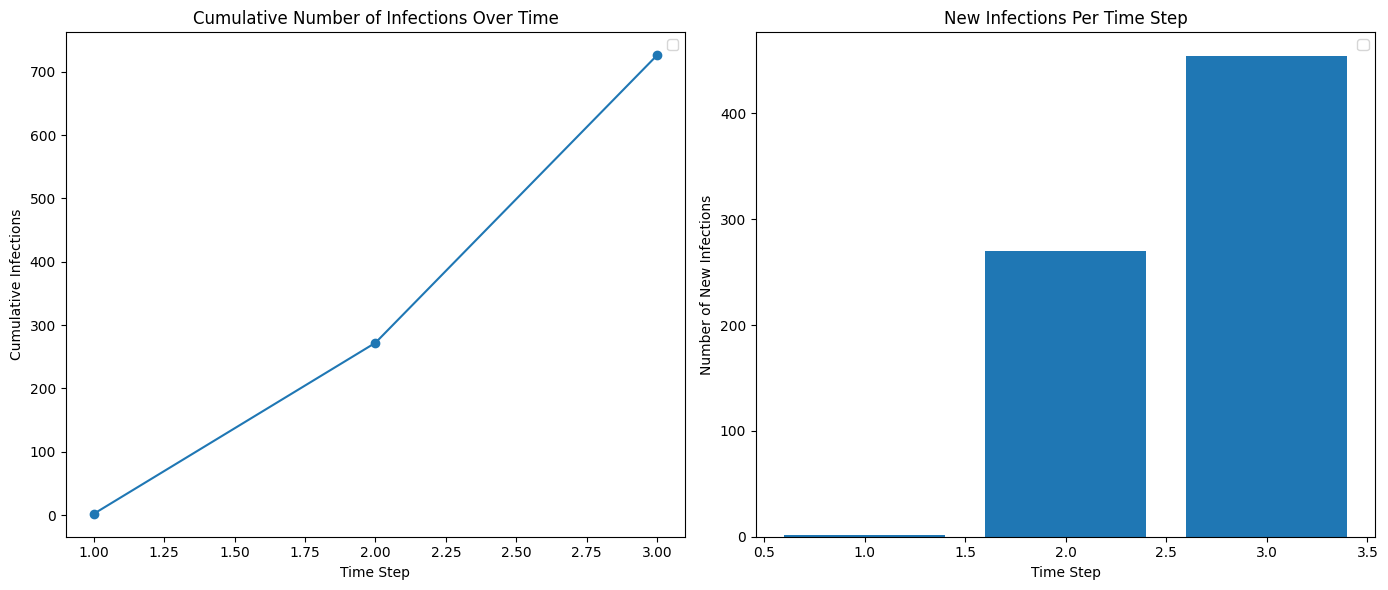

In [9]:
# Main function to run the simulation
def main():
    """
    Main function to read input and run simulation.
    """
    # Program 1 Inputs
    filename = input("Enter the filename of the CSV file for the graph: ") # first input
    p_infect = float(input("Enter the probability value of the worm infecting an uninfected node (p_infect): "))  # second input
    initial_infected = input("Enter the initial infected node(s) separated by commas: ").split(',') # third input

    # Program 2 Inputs
    p_defense = float(input("Enter the probability value of a node getting inoculated or cured (p_defense): "))
    initial_cured = input("Enter the initial cured node(s) separated by commas: ").split(',')
    
    graph = load_graph_from_csv(filename)

    num_simulations = 10

    def run_first_simulation():
        for i in range(num_simulations):
            total_time =0
            time_taken_1, infection_history_1 = simulate_infection(graph.copy(), p_infect, initial_infected)
            total_time += time_taken_1
            print(f"Simulation {i+1}:")
            for round, infected_nodes in enumerate(infection_history_1, start=1):
                print(f" Round {round}: {infected_nodes}")

        # Results
        average_time_1 = total_time / num_simulations
        print("Average time taken to infect all nodes: ", average_time_1)
        
        # Plot
        plot_results_1(infection_history_1)
    
    def run_second_simulation():
        for i in range(num_simulations):
            total_time =0
            time_taken_2, infection_history_2, cured_history_2 = simultaneous_infection_with_defense(graph.copy(), p_infect, p_defense, initial_infected, initial_cured)
            total_time += time_taken_2
            print(f"Simulation {i+1}:")
            for round, infected_nodes in enumerate(infection_history_2, start=1):
                print(f" Round {round}: {infected_nodes}")
        
        # Results
        average_time_2 = total_time / num_simulations
        print("Average time taken to infect all nodes with defense mechanism:", average_time_2)

        # Plot
        plot_results_2(infection_history_2, cured_history_2)

    # Choice to determine which simulation to run
    choice = input("Enter \n 1 to run the infection simulation, \n 2 to run the infection simulation with defense, or \n 3 to run both: ")
    
    if choice == '1':
        run_first_simulation()

    elif choice == '2':
        run_second_simulation()

    elif choice == '3':
        run_first_simulation()
        run_second_simulation()

    else:
        print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()

1. Erdos-Reyni Network showed uniform spread to their random nature.
2. Barabasi-Albert Network with free-scale properties, exhibited faster initial spread due to the presence of highly connected nodes.
3. Watts-Strogatz Network demonstrated a mix of behaviours due to their small-world properties, with rapid spread within local clusters(rings) but slower spread between them

The rate absolutely depends on the type of network.


## Deliverable (b)
I believe drawing analogies between the observations from the worm propagation simulation and the current pandemic invovles understanding how the dynamics of infectious disease spread in populations and how interventions (like vaccines or treatments) can impact this spread.

### 1. Initial Spread and R<sub>0</sub> 
The basic reproduciton number R<sub>0</sub> in epidemology indicates the average number of people(here nodes) to whom a single infected person will transmit the virus(infection) in a fully susceptible population. Similarly, in worm propagation simulation, the probability *p<sub>infect</sub>* of infecting an unifected node refelcts the ease of spread. Networks with higher connection ( for e.g., Watts-Strogatz Network) probabilities can see faster and wider spread, mirrong how a higiher R<sub>0</sub> can lead to more rapid pandemic escalation.

### 2. Some Effects of Network Structure
**Erdös-Rényi networks** can be likened to randomly mixing populations where each individual has a roughly equal probability of interacting with any other individual. This structure is idealized and not often found in real populations.

**Barabási-Albert networks** reflect scale-free networks with few highly connected nodes (hubs) and many nodes with fewer connections. This can be analogous to super-spreader events where certain individuals or locations contribute disproportionately to the spread of a disease.

**Watts-Strogatz networks** demonstrate small-world properties with high clustering and short path lengths, akin to real-world social networks where tight-knit communities (clusters) have occasional bridges connecting them to other communities. Diseases can spread rapidly within clusters but may spread more slowly between them without those bridges.

### 3. Impact of Interventions
Identifying defense mechanism can drastically slow down or even halt the spread, mirroring the effects of public health interventions like vaccination, lockdowns, and contact-tracing in real-world pandemic. For example, the delay was observed in one of the above observations in **Barabasi-Albert network** the infection w/o cure has taken 6.73 sec while w/ cure has taken 17.6 sec. 

### 4. S-Shaped or Bell-Shaped Curves
As explained previously, the shape is affected by the **type** network and the **number of nodes** in the network. The shape of the bell-curve of new infections per time (rounds) mirrors the daily cases in a pandemic, peaking when the spread is most rapid and taperingas interventions take effect or susceptible individuals become less common.

### 5. Herd Immunity and Incoluation
Reaching a point where a sufficient portion of the network is inoculated can lead to herd immunity, significantly slowing the spread of the worm(infection) to nodes that are not immune yet. The simulation's defense mechanisms can be seen as analogous to vaccinations efforts and the concepts of herd immunity in controlling the spread of infectious diseases.

# TODO -  Different test cases